<a href="https://colab.research.google.com/github/DarK-ML/Text-Reconstruction-Application/blob/master/Text_Reconstruction_Application_DarkML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Tasks for Basic Autoencoder Assignment

In [0]:
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad
from sklearn.model_selection import train_test_split
np.random.seed(111)

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step






A convolution sweeps the window through images then calculates its input and filter dot product pixel values. This allows convolution to emphasize the relevant features. The more filters deployed, the more features that CNN will extract. This allows more features to be found but with the cost of more training time. There is a sweet spot for the number of layers. Smaller filters collect as much local information as possible, bigger filters represent more global, high-level and representative information. Essentially, the convolution layers promote weight sharing to examine pixels in kernels and develop visual context to classify images. Unlike Neural Network (NN) where the weights are independent, CNN’s weights are attached to the neighboring pixels to extract features in every part of the image. CNN uses max pooling to replace output with a max summary to reduce data size and processing time. This allows you to determine features that produce the highest impact and reduces the risk of overfitting. Too many neurons, layers, and training epochs promote memorization and inhibit generalize. The more you train your model, the more likely it becomes too specialized. To counter this, you could reduce the complexity by removing a few hidden layers and neurons per layer. Alternatively, you could also use regularization techniques such as Dropout to remove activation unit in every gradient step training. Each epoch training deactivates different neurons.Since the number of gradient steps is usually high, all neurons will averagely have same occurrences for dropout. Intuitively, the more you drop out, the less likely your model memorizes.


Values of some variables used in part (1 and 2) -> 
epochs=50,  batch_size=128



******************Please RUN only one of the 7 given models at a time for training the model!!  ********************

In [0]:
##(..1..)## Given Basic CNN model ##           loss: 0.0910 - val_loss: 0.0901      optimizer='adam', loss='binary_crossentropy'

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [0]:
##(..2..)## CNN complex model 1:   loss: 0.0585 - val_loss: 0.0581        optimizer='adam', loss='binary_crossentropy'

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


We can compare the above two models and conclude that MaxPooling2D() did not improve the accuracy of our model.
What is Max Pooling?
Max Pooling is a convolution process where the Kernel extracts the maximum value of the area it convolves. Max Pooling simply says to the Convolutional Neural Network that we will carry forward only that information, if that is the largest information available amplitude wise.
But in our case, each pixel is important for us as the image size is already very small(27 x 27) and hence Max Pooling is not beneficial here. In general, we use MaxPooling2D() when the image size is very large.

In [0]:
##(..3..)## CNN complex model 2:          loss: 0.0584 - val_loss: 0.0581          optimizer='adam', loss='binary_crossentropy'

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()



Why do we use batch normalization?
We normalize the input layer by adjusting and scaling the activations. For example, when we have features from 0 to 1 and some from 1 to 1000, we should normalize them to speed up learning. If the input layer is benefiting from it, why not do the same thing also for the values in the hidden layers, that are changing all the time, and get more improvement in the training speed.
Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift). To explain covariance shift, let’s have a deep network on cat detection. We train our data on only black cats’ images. So, if we now try to apply this network to data with colored cats, it is obvious; we’re not going to do well. The training set and the prediction set are both cats’ images but they differ a little bit. In other words, if an algorithm learned some X to Y mapping, and if the distribution of X changes, then we might need to retrain the learning algorithm by trying to align the distribution of X with the distribution of Y. 
Also, batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers.
It reduces overfitting because it has a slight regularization effects.

In [0]:
##(..4..)##  CNN complex model 3:       0.0618 - val_loss: 0.0617        optimizer='adam', loss='binary_crossentropy'

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(16, (1, 1), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (1, 1), activation='relu', padding='same')(x)
encoded = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.Conv2D(16, (1, 1), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (1, 1), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

It seems that the point of saturation for the number of layers has been crossed and now instead of increasing, the accuracy is decreasing.

In [0]:
##(..5..)## Dense multilayer model 1:     loss: 1.8511 - val_loss: 1.8399      optimizer='adam', loss='binary_crossentropy'

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Flatten()(input_img)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(28*28*28,activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.Dense(28*28,activation = "relu")(x)

x = tf.keras.layers.Dense(28*28,activation = "relu")(encoded)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(28*28*28,activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
decoded = tf.keras.layers.Reshape((28, 28,1))(x)  

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 21952)             17232320  
_________________________________________________________________
dropout_3 (Dropout)          (None, 21952)             0   

Why CNNs?
The CNNs have several different filters/kernels consisting of trainable parameters which can convolve on a given image spatially to detect features like edges and shapes. These high number of filters essentially learn to capture spatial features from the image based on the learned weights through back propagation and stacked layers of filters can be used to detect complex spatial shapes from the spatial features at every subsequent level. Hence they can successfully boil down a given image into a highly abstracted representation which is easy for predicting.
In Dense networks we try to find patterns in pixel values given as input for eg. if pixel number 25 and 26 are greater than a certain value it might belong to a certain class and a few complex variations of the same. This might easily fail if we can have objects anywhere in the image and not necessarily centered like in the MNIST or to a certain extent also in the Fashion-MNIST data.

In [0]:
##(..6..)## Dense multilayer model 2:     loss: 1.1832 - val_loss: 1.1326     optimizer='adam', loss='binary_crossentropy'

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Flatten()(input_img)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
encoded = tf.keras.layers.Dense(28*28,activation = "relu")(x)

x = tf.keras.layers.Dense(28*28,activation = "relu")(encoded)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
decoded = tf.keras.layers.Reshape((28, 28,1))(x)  

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


In [0]:
##(..7..)# Dense multilayer model 3:        loss: 1.8631 - val_loss: 1.8760    optimizer='adam', loss='binary_crossentropy'


input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Flatten()(input_img)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
encoded = tf.keras.layers.Dense(28*28,activation = "relu")(x)

x = tf.keras.layers.Dense(28*28,activation = "relu")(encoded)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Dense(28*28,activation = "relu")(x)
decoded = tf.keras.layers.Reshape((28, 28,1))(x)  

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

As we increase the number of hidden layers, the accuracy first increases and then after some point it start decreasing. This is the case happened to our above model.

In [0]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

### 2. Denoising autoencoder

In [0]:
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad
from sklearn.model_selection import train_test_split
np.random.seed(111)

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
 ##(..1..)# CNN complex model 1:                      loss: 0.1521 - val_loss: 0.1498

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

                 Rest of the models are same as given in 3rd part

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

### 3. Text Reconstruction Application

[-----> For Detailed analysis click this link <------](https://docs.google.com/document/d/1Q11qAXeZ2Ok6t_vUGPUMKDUtZ3M8cHpUgnUdbQLAzsM/edit?usp=sharing)

Values of some variables used in part 1 -> epochs=25, batch_size=16

In [0]:
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad
from sklearn.model_selection import train_test_split
np.random.seed(111)

In [0]:
! git clone https://github.com/iamsivab/Deep-Learning-CNN-AutoEncoder

Cloning into 'Deep-Learning-CNN-AutoEncoder'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [0]:
from zipfile import ZipFile 
with ZipFile("/content/Deep-Learning-CNN-AutoEncoder/train.zip", 'r') as zip: 
    zip.extractall()

from zipfile import ZipFile 
with ZipFile("/content/Deep-Learning-CNN-AutoEncoder/test.zip", 'r') as zip: 
    zip.extractall()

from zipfile import ZipFile 
with ZipFile("/content/Deep-Learning-CNN-AutoEncoder/train_cleaned.zip", 'r') as zip: 
    zip.extractall()
    

In [0]:
X = []
Y = []
Z = []

for img in os.listdir('/content/train'):
    img = load_img('/content/train' +'/'+ img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in os.listdir('/content/train_cleaned'):
    img = load_img('/content/train_cleaned' +'/'+ img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in os.listdir('/content/test'):
    img = load_img('/content/test' +'/'+ img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Z.append(img)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)
print("Size of Z : ", Z.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Size of Z :  (72, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


In [0]:
##(..1..)## Complex CNN Model 1  ###***The Best***               loss: 0.0012 - val_loss: 0.0014            optimizer='adam', loss='mean_squared_error'
###   After epochs = 100, batch_size = 8 we get::=>  loss:  0.00041 - val_loss: 0.00047
# Lets' define our autoencoder now
def build_autoenocder():
    input_img = Input(shape=(420,540,1), name='image_input')
 
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')(input_img)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)    
    autoencoder = Model(inputs=input_img, outputs=decoded)
#   loss = 'mean_squared_error' , 'binary_crossentropy', 'mean_absolute_error'
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder
autoencoder = build_autoenocder()
autoencoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 420, 540, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 420, 540, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 420, 540, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 420, 540, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 420, 540, 1)       1153      
Total params: 103,073
Trainable params: 103,073
Non-trainable params: 0
_______________________________________________________

In [0]:
##(..2..)##  Complex CNN model 2  ###   

# Lets' define our autoencoder now
def build_autoenocder():
    input_img = Input(shape=(420,540,1), name='image_input')
    #enoder 
    # enter encoder model here
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
#    x = tf.keras.layers.Dropout(0.3, noise_shape=None, seed=None)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
#    x = tf.keras.layers.Dropout(0.4, noise_shape=None, seed=None)(x)

    autoencoder = Model(inputs=input_img, outputs=decoded)
#   loss = 'mean_squared_error' , 'binary_crossentropy', 'mean_absolute_error'
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder
autoencoder = build_autoenocder()
autoencoder.summary()


In [0]:
##(..3..)##   Dense Multi layer Model  ####
### *****************Warning : This model might not run on low processing unit. It requires substantial processing power *****************
def build_autoenocder():
    input_img = Input(shape=(420,540,1), name='image_input')

    x = tf.keras.layers.Flatten()(input_img)
    x = tf.keras.layers.Dense(2000,activation = "relu")(x)
    x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(2000,activation = "relu")(x)
    x = tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dense(226800,activation = "relu")(x)
    decoded = tf.keras.layers.Reshape((420, 540,1))(x)    

    autoencoder = Model(inputs=input_img, outputs=decoded)
#   loss = 'mean_squared_error' , 'binary_crossentropy', 'mean_absolute_error'
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder
autoencoder = build_autoenocder()
autoencoder.summary()


In [0]:
autoencoder.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_valid, y_valid))


Epoch 1/25
9/9 [==============================] - 5s 505ms/step - loss: 0.0946 - val_loss: 0.0759
Epoch 2/25
9/9 [==============================] - 3s 373ms/step - loss: 0.0593 - val_loss: 0.0472
Epoch 3/25
9/9 [==============================] - 3s 372ms/step - loss: 0.0350 - val_loss: 0.0232
Epoch 4/25
9/9 [==============================] - 3s 373ms/step - loss: 0.0159 - val_loss: 0.0130
Epoch 5/25
9/9 [==============================] - 3s 373ms/step - loss: 0.0097 - val_loss: 0.0078
Epoch 6/25
9/9 [==============================] - 3s 375ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 7/25
9/9 [==============================] - 3s 373ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 8/25
9/9 [==============================] - 3s 372ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 9/25
9/9 [==============================] - 3s 372ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 10/25
9/9 [==============================] - 3s 372ms/step - loss: 0.0034 - val_loss: 0.0047
Epoch 11/25
9/9 [==

In [0]:
pred = autoencoder.predict(Z)

Test Images


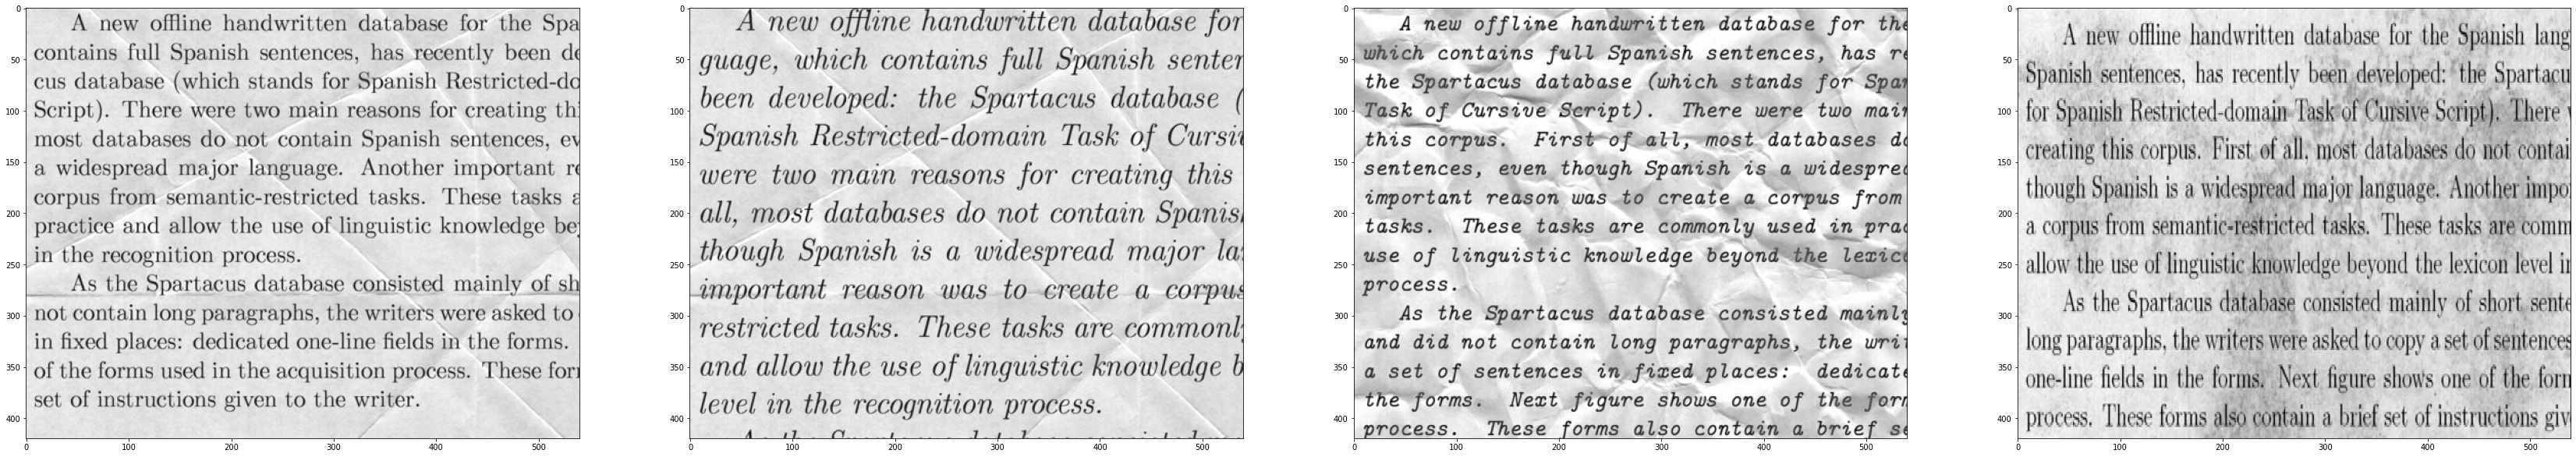

Reconstruction of Test Images


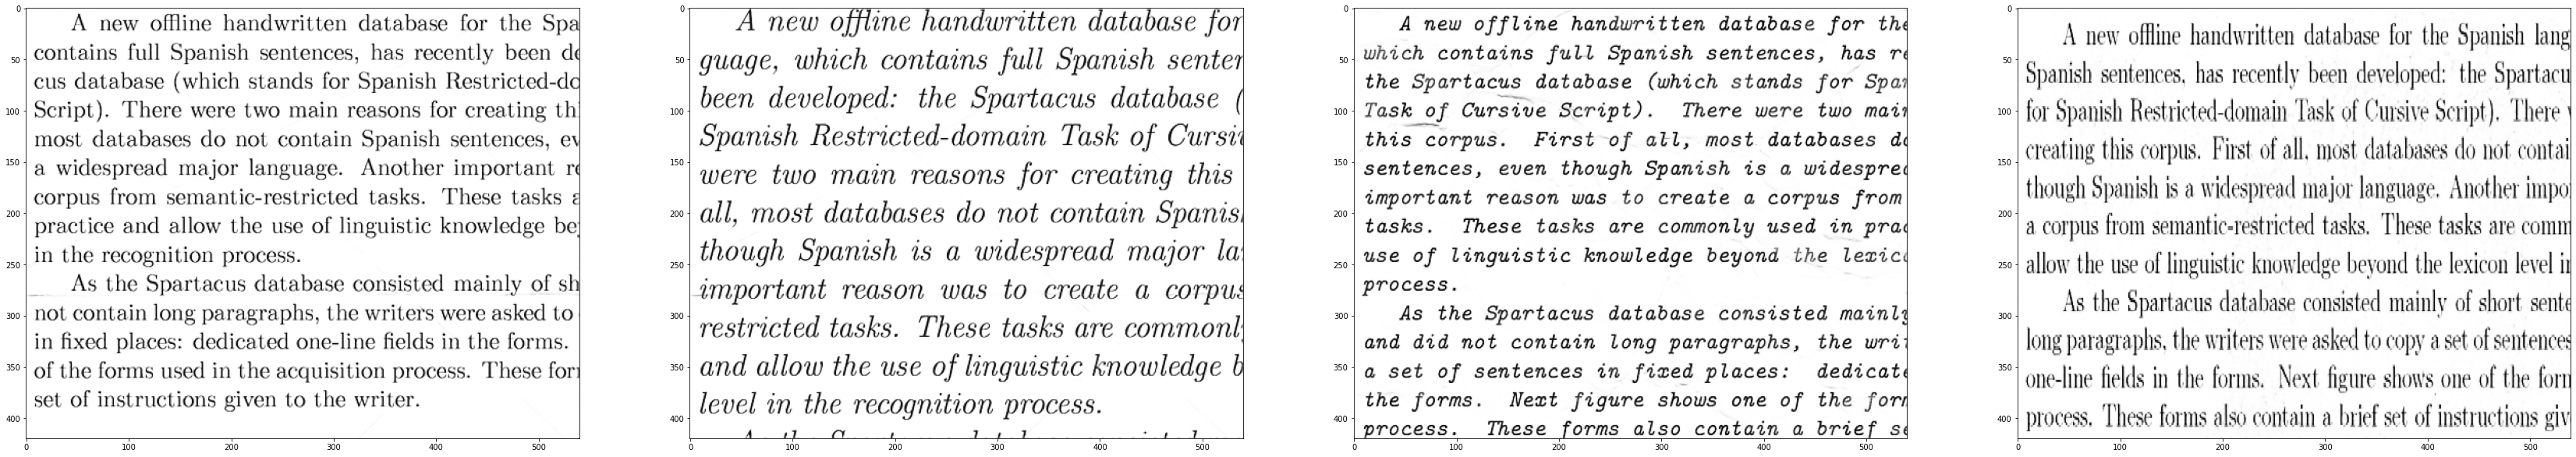

In [0]:
plt.figure(figsize=(150, 120))
print("Test Images")
for i in range(4):
    plt.subplot(2, 10, i+1)
    plt.imshow(Z[i, ..., 0], cmap='gray')
    #curr_lbl = test_labels[i]
    #plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(150, 120))
print("Reconstruction of Test Images")
for i in range(4):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()